In [1]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from glob import glob
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

In [2]:
# Load all model predictions
models = ['lstm', 'conv1d', 'conv2d']
model_predictions = {}

for model_name in models:
    pred_file = f'../logs/y_pred_{model_name}.npy'
    if os.path.exists(pred_file):
        model_predictions[model_name] = np.load(pred_file)
        print(f"Loaded {model_name} predictions")
    else:
        print(f"Warning: {pred_file} not found")

print(f"\nModels available: {list(model_predictions.keys())}")

Loaded lstm predictions
Loaded conv1d predictions
Loaded conv2d predictions

Models available: ['lstm', 'conv1d', 'conv2d']


In [3]:
wav_paths = glob('{}/**'.format('../wavfiles'), recursive=True)
wav_paths = sorted([x.replace(os.sep, '/') for x in wav_paths if '.wav' in x])
classes = sorted(os.listdir('../wavfiles'))
labels = [os.path.split(x)[0].split('/')[-1] for x in wav_paths]
le = LabelEncoder()
y_true = le.fit_transform(labels)
y_hot = to_categorical(y_true)

# Store true labels untuk semua model
y_true_labels = [classes[x] for x in y_true]
unique_labels = np.unique(labels)
n_classes = len(set(y_true))

print(f"Total samples: {len(y_true)}")
print(f"Number of classes: {n_classes}")
print(f"Classes: {unique_labels}")

Total samples: 300
Number of classes: 10
Classes: ['Acoustic_guitar' 'Bass_drum' 'Cello' 'Clarinet' 'Double_bass' 'Flute'
 'Hi_hat' 'Saxophone' 'Snare_drum' 'Violin_or_fiddle']



EVALUATING: LSTM



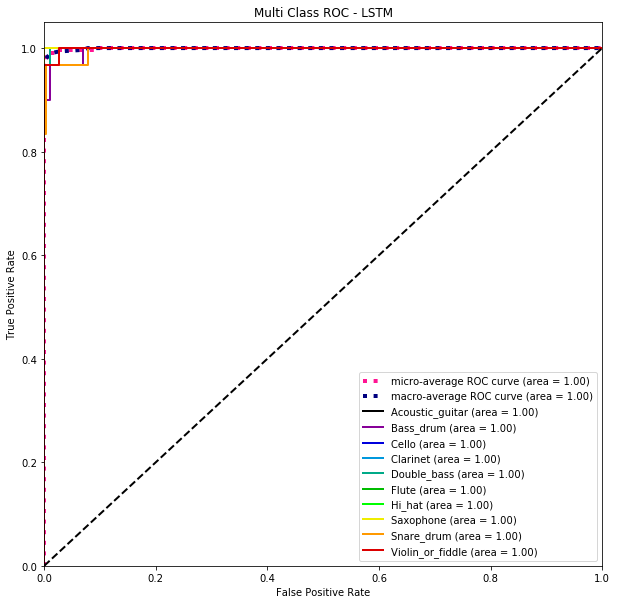

Classification Report:
                  precision    recall  f1-score   support

 Acoustic_guitar       0.86      1.00      0.92        30
       Bass_drum       1.00      0.97      0.98        30
           Cello       1.00      0.93      0.97        30
        Clarinet       1.00      1.00      1.00        30
     Double_bass       0.97      0.93      0.95        30
           Flute       1.00      1.00      1.00        30
          Hi_hat       1.00      1.00      1.00        30
       Saxophone       1.00      1.00      1.00        30
      Snare_drum       0.97      0.97      0.97        30
Violin_or_fiddle       1.00      0.97      0.98        30

        accuracy                           0.98       300
       macro avg       0.98      0.98      0.98       300
    weighted avg       0.98      0.98      0.98       300



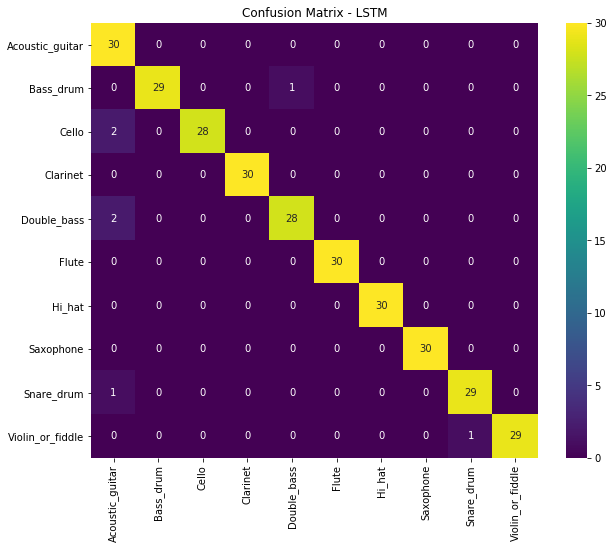


EVALUATING: CONV1D



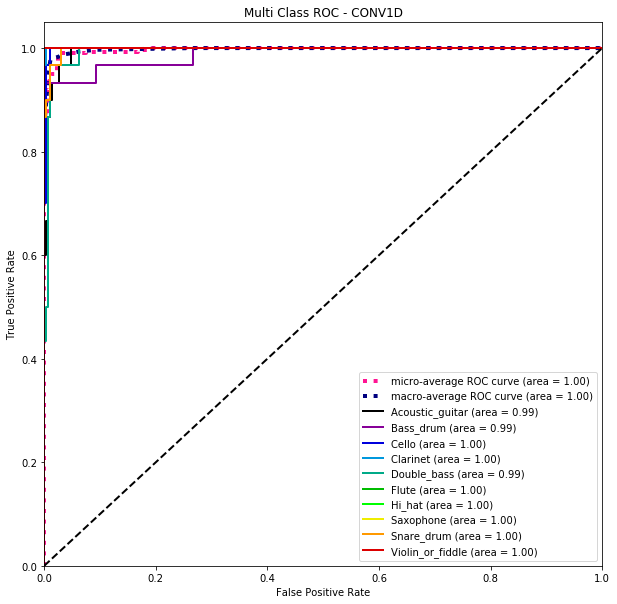

Classification Report:
                  precision    recall  f1-score   support

 Acoustic_guitar       0.76      0.97      0.85        30
       Bass_drum       0.96      0.90      0.93        30
           Cello       0.86      1.00      0.92        30
        Clarinet       0.91      1.00      0.95        30
     Double_bass       0.88      0.50      0.64        30
           Flute       1.00      1.00      1.00        30
          Hi_hat       1.00      1.00      1.00        30
       Saxophone       1.00      1.00      1.00        30
      Snare_drum       1.00      0.97      0.98        30
Violin_or_fiddle       1.00      1.00      1.00        30

        accuracy                           0.93       300
       macro avg       0.94      0.93      0.93       300
    weighted avg       0.94      0.93      0.93       300



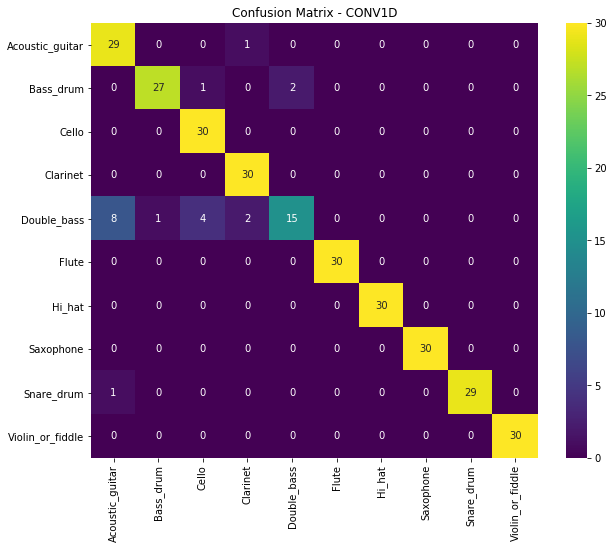


EVALUATING: CONV2D



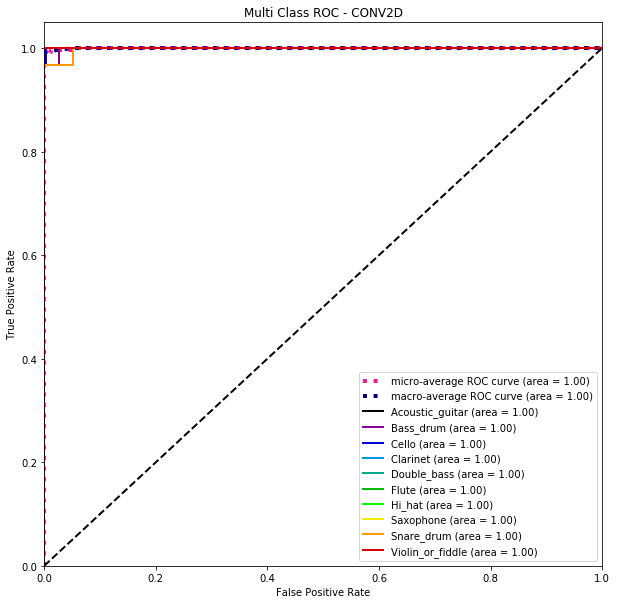

Classification Report:
                  precision    recall  f1-score   support

 Acoustic_guitar       0.97      1.00      0.98        30
       Bass_drum       0.97      1.00      0.98        30
           Cello       0.97      0.97      0.97        30
        Clarinet       1.00      1.00      1.00        30
     Double_bass       1.00      0.97      0.98        30
           Flute       1.00      1.00      1.00        30
          Hi_hat       1.00      1.00      1.00        30
       Saxophone       1.00      1.00      1.00        30
      Snare_drum       1.00      0.97      0.98        30
Violin_or_fiddle       0.97      0.97      0.97        30

        accuracy                           0.99       300
       macro avg       0.99      0.99      0.99       300
    weighted avg       0.99      0.99      0.99       300



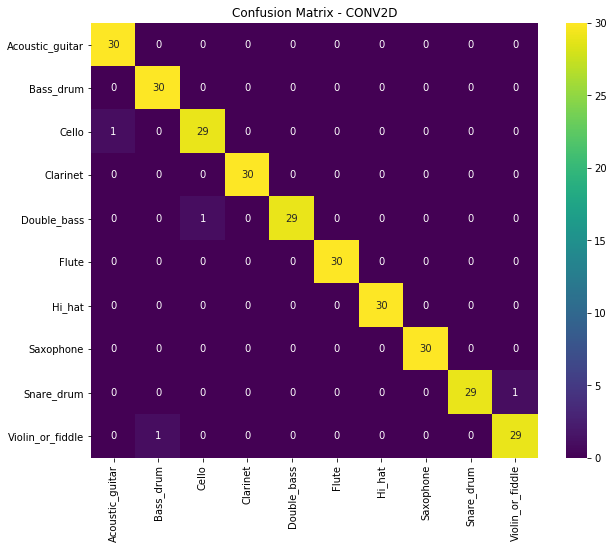

In [4]:
# Evaluate each model
for model_name in model_predictions.keys():
    y_pred = model_predictions[model_name]
    y_pred_le = np.argmax(y_pred, axis=1)
    y_pred_labels = [classes[x] for x in y_pred_le]
    
    print(f"\n{'='*70}")
    print(f"EVALUATING: {model_name.upper()}")
    print(f"{'='*70}\n")
    
    # Calculate ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_hot[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_hot.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot ROC curves
    plt.figure(figsize=(10,10))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    
    colors = []
    cm_plot = pylab.get_cmap('nipy_spectral')
    for i in range(n_classes):
        color = cm_plot(1.*i/n_classes)
        colors.append(color)
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='{0} (area = {1:0.2f})'.format(unique_labels[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi Class ROC - {model_name.upper()}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels, labels=unique_labels))
    
    # Confusion Matrix
    conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=unique_labels)
    df_cm = pd.DataFrame(conf_mat, index=unique_labels, columns=unique_labels)
    plt.figure(figsize=(10,8))
    plt.title(f'Confusion Matrix - {model_name.upper()}')
    sns.heatmap(df_cm, annot=True, cmap='viridis')
    plt.show()